In [1]:
%run util.ipynb
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
class adaline():
    
    # eta is the learning rate and n_iter is the number of epochs
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        N, D = X.shape
        
        self.costs = []
        self.w = np.zeros(D + 1)
        
        # iterate through epochs
        for i in range(self.n_iter):
            activation = np.dot(X, self.w[1:]) + self.w[0] # activation function
            error = (Y - activation)
            
            self.w[0] += self.eta * error.sum() # Bias term
            self.w[1:] += self.eta  * X.T.dot(error) # matrix-vector multiplication as a dot product: (NxD) Transposed x (N, 1)
            
            cost = (error**2).sum() / 2.0
            self.costs.append(cost)
        
        plt.plot(self.costs)
        
    # return +1 or -1 depending on whether Xw + w0 is positive or not
    def predict(self, X):
        return np.sign(X.dot(self.w[1:]) + self.w[0])
    
    def score(self,X,Y):
        P = self.predict(X)
        return np.mean(P == Y)  

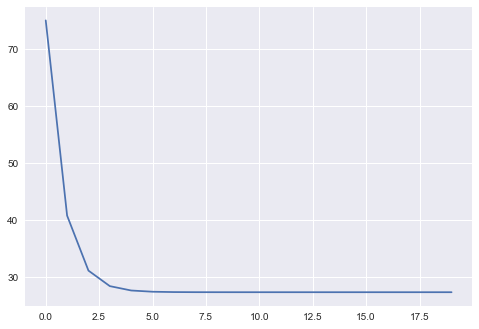

In [15]:
# generating a test data set

def get_data_separable():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300,2))*2 -1
    Y = np.sign(X.dot(w) + b)
    return X, Y


if __name__ == '__main__':
    X, Y = get_data_separable()
       
    Ntrain = int(len(Y) / 2)
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = adaline(eta=0.01, n_iter=20)
    model.fit(Xtrain,Ytrain)

In [13]:
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Test accuracy:", model.score(Xtest, Ytest))

Train accuracy: 0.953333333333
Test accuracy: 0.973333333333


In [27]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([1,1,1])
print(a.T,b)
print(a.shape)
a.dot(b)

[[1 4]
 [2 5]
 [3 6]] [1 1 1]
(2, 3)


array([ 6, 15])